# PHYS 250 Computational Midterm Exam

**Notes:**

1. You have 2 hours to do the exam.  Your solution must be uploaded to Canvas (exactly as is done for the prelabs and labs) as a notebook file with its name unchanged. **Late exams will not be accepted.** A little bit of extra time has been allotted on Canvas for you to turn it in before it will claim the exam is late. This is meant to insure that you have a full 2 hours to work on the exam, and then a little bit of time to turn in it. It is not extra time to work on the exam!
2. You must work on the exam yourself. It must all be your work. You are free to use resources from the course (prelabs, labs, and examples) as you wish **but not other people** (this even excludes people not in the course) nor coding tools (ai or otherwise). I am trying to be flexible in terms of when people can work on this portion of the exam.  This means different students will be working on the exam at different times. **Do not discuss the exam with other students until everyone has completed it.**
3. The exam is meant to be completed in the allotted time. I may have misjudged the amount of time the questions will take. Keep in mind that everyone is in the same situation as yourself. If the exam is too long everyone will suffer similarly and I will take that into account when assigning grades. It is best to look at all the problems and do as much work as you can starting with the problem you are most comfortable with.
4. The points for each problem are given below. You can use this information to decide how to apportion your time working on the problems.
5. When I ask for descriptions include all the information you think is relevant to convince me that (a) you know how to solve the problem, and (b) can be used to reproduce the results if someone else in the class were given the description. The more clear these descriptions are the better chance I have in understanding what you have done and assigning partial credit. When making nice plots you must follow all the good practices discussed and used in the labs.
6. **Restart the kernel and rerun the notebook** before turning it in. Part of the grading process is rerunning the notebook. The state you left the notebook in is not the final state.  It is the rerun notebook that will be graded, not the static version as turned in. See Lab00 to remind yourself of what is expected.
7. **Read the questions carefully.** There is important information given in various places in various parts of the problem. Do not skip reading sections, even if they are very small.

## Initialization

Collect all your initialization here.

In [193]:
#INITIALIZATION
import sys
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interp
import scipy.optimize as opt
import matplotlib as mpl
import scipy.special as sf
import scipy.integrate as integ
mpl.rc('xtick', direction='in', top=True)
mpl.rc('ytick', direction='in', right=True)
mpl.rc('xtick.minor', visible=True)
mpl.rc('ytick.minor', visible=True)

#if using random numbers
rng = np.random.default_rng()

## 1. A Little Probability (10 points)

Suppose an event has a probability $p$ of happening.
The probability that the event will happen $n$ times in a row is $p^n$.
For example, the probability of rolling a 1 on a six sided die is $p=1/6$, so, the probability of rolling 10 ones in a row is $(1/6)^{10}$.

Suppose we have two events that are **uncorrelated**.
Let $p_1$ be the probability of event 1 and $p_2$ be the probability of event 2.
Then, the probability that both happen is the product of the two probabilities: $p = p_1 p_2$.
The probability that both happen $n$ times in a row is $p^n = (p_1 p_2)^n$.
For example, the probability of flipping a heads on a coin and rolling a 1 on a six sided die, each together 10 times in a row is $(1/12)^{10}$.

According the [Minecraft wiki](https://minecraft.wiki/w/Leaves), when an oak leaf decays it has uncorrelated probabilities $p_1 = 0.05$ of dropping a sapling, $p_2 = 0.02$ of dropping one or two sticks, and $p_3 = 0.005$ of dropping an apple(?!)

Calculate and print the probability that a single oak leaf will drop all three items.

In [194]:
p1 = .05
p2 = .02
p3 = .005

p=p1*p2*p3
print(f'An oak leaf has a probablity {p} of dropping a sapling, one or two sticks, and an apple.')

An oak leaf has a probablity 5e-06 of dropping a sapling, one or two sticks, and an apple.


I saw somewhere that the maximum number of leaves a Mincraft oak tree can have is about 230.
We will use this number.
Calculate and print the probability that every one of these leaves will drop all three items.
(*Note:* We are treating the probabilities as floating point numbers and performing a floating point calculation.)

In [195]:
allp = p**230
print(f'The probability that every leaf on an oak tree will drop a sapling, one or two sticks, and an apple is {allp}.')

The probability that every leaf on an oak tree will drop a sapling, one or two sticks, and an apple is 0.0.


You should find a probability of zero, but there is a finite probability.
This can happen!

In base ten we can write any number (in this case less than one) in scientific notation as
$$ p = m \times 10^{-e}. $$
Briefly explain why our previous calculation gave zero when we know it is a finite number.

Our initial probability is on the order of $10^{-6}$, and we then raise that to the 230th power. An exponent raised to a power is multiplied, so our final value is on the order of $10^{-1380}$. This is much smaller than the smallest value a double precision floating point value can store. Using `sys.float_info.min`, we find that the smallest value a float can store is on the order of $10^{-308}$. In other words, the problem here is limited precision. 

There are a few ways to work around this in Python though we will continue to work with floating point numbers (and not use Python specific tools that could also handle this computation).

When dealing with extremely large or extremely small (in magnitude) numbers the best approach is to not directly compute $p$, but instead compute $\log_{10}(p)$.
When we **analytically rewrite the computation** of $p$ as the computation of $\log_{10}(p)$ we will only be working with numerical values that the computer can handle.
From this we can then directly compute and store $m$ and $e$ and thus know how to represent $p$ in scientific notation.

Going back to our calculation, again compute the probability that all 230 oak leaves will drop all three items.
Now do so by calculating the logarithm of this probability and use the result to find and print $m$ and $e$.
Recall the $e$ is an integer and $m$ is positive.
We prefer that $10 < m \le 1$, but it is fine to not perform this extra step.

In [196]:
p=p1*p2*p3
allp = np.log10(p)*230
allp

-1219.2368990027157

You will find that no matter how popular Minecraft may remain, no matter how many people play it, nor for how long, no player will ever have all the leaves on a maximum sized oak tree drop all three items!

## 2. Epitrochoid (20 points)

There are many interesting shapes that can be made by considering the curve traced out by a point on a circle as it rolls along some other curve.
The cycloid is the most famous example: the curve traced out by a point on the edge of a circle as the circle rolls along a line.
Another interesting example is an epitrochoid: the curve traced out by a point on the edge of a circle of radius $b$ as the circle rolls on the outside of another circle of radius $a$.
In terms of a parameter $u$ this curve can be written as
\begin{align}
    x(u) &= (a+b) \cos u - c \cos\!\left( \frac{a+b}{b} u \right), \\
    y(u) &= (a+b) \sin u - c \sin\!\left( \frac{a+b}{b} u \right).
\end{align}

To get started and to make some of the subsequent analysis easier, write two functions, one for $x(u)$ and one for $y(u)$.
The functions will be called as `epitrochoid_x(u, a, b, c)` and `epitrochoid_y(u, a, b, c)`.
**For this problem only** you do not need to document your functions.
We will be writing simple functions in a simple way.

Evaluate these functions for $-5 \le u \le 10$ when $a = 1$, $b = 2$, and $c = 1$.
Produce a quick plot of $y$ versus $x$.
This will show what the curve looks like on the $xy$-plane.
You should find that it looks something like two nested approximately ellipsoidal shapes with the curve crossing itself at a point with $x<0$ and $y=0$.
(*Note*: As with any quick plot you do not need to do all the usual steps, you can just quickly produce a plot without the labels, etc. Also, the shapes look ellipsoidal due to the rectangular aspect ratio of the standard plot, they actually are nearly circular.)

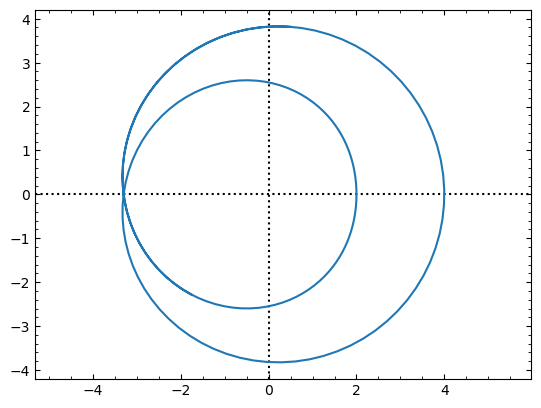

In [197]:
def epitrochoid_x(u, a, b, c):
    return (a+b)*np.cos(u)-c*np.cos(((a+b)/b)*u)

def epitrochoid_y(u, a, b, c):
    return (a+b)*np.sin(u)-c*np.sin(((a+b)/b)*u)

u = np.linspace(-5, 10, 200)
a=1
b=2
c=1

x = epitrochoid_x(u,a,b,c)
y = epitrochoid_y(u,a,b,c)

plt.plot(x,y)
plt.axis('equal')
plt.axhline(0,c='k', ls=':', zorder=0)
plt.axvline(0,c='k', ls=':', zorder=0)

We next want to "separate" the two ellipsoidal shape to allow us to separately work with the inner and outer shapes.
We can do this by first looking at $x(u)$ and $y(u)$.
Produce another quick plot, this time one that contains both $x$ versus $u$ and $y$ versus $u$ in a single plot.
It is convenient to also draw in the horizontal axes at 0 as a reference.

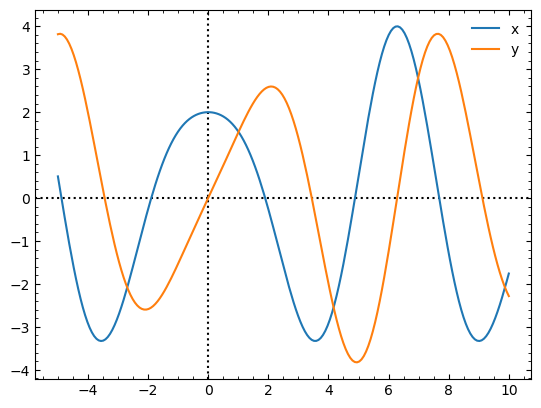

In [198]:
plt.plot(u,x, label='x')
plt.plot(u,y, label='y')
plt.axhline(0,c='k', ls=':', zorder=0)
plt.axvline(0,c='k', ls=':', zorder=0)
plt.legend(frameon=False)

We saw in the first plot that the curve crosses itself at a point $x<0$ and $y=0$.
We would like the find the values of $u$ for which this is true.
For the range of $u$ I had you plot the first time $y=0$ with $x<0$ is where the curve begins traveling around the inner shape in a clockwise direction.
The second time $y=0$ with $x<0$ is where the curve finishes traveling around the inner shape and begins traveling around the outer shape in a clockwise direction.
Finally, the third time $y=0$ with $x<0$ is where the curve finishes traveling around the outer shape and begins retracing itself along the inner shape.

Find the three values $u_j$ of the parameter at the crossing point as described above.
Print these three values.

(Of course you can verify for yourself that all the $x(u_j)$ are equal and have a sensible looking values.)

In [199]:
roots = np.array([0.,0.,0.])
roots[0]=opt.brentq(epitrochoid_y, -4,-2, args=(a,b,c))
roots[1]=opt.brentq(epitrochoid_y, 3,5, args=(a,b,c))
roots[2]=opt.brentq(epitrochoid_y, 8,10, args=(a,b,c))

print('The three roots of y where x<0 are:', roots)

The three roots of y where x<0 are: [-3.4455369   3.4455369   9.12083371]


Now that we have separated the two parts of the curve we can make a nice plot.
Make a nice plot of the curve broken into two pieces (meaning they are styled differently in some way to distinguish them).
Include in the figure a point at the location where the curve intersects itself.
You do not need to include a legend in this figure since there really is only one curve and we will be able to tell that one is inner and one is outer!
(*Note*: You can use the `set_aspect` axes method to get a square plot, if you prefer.)

Text(0.5, 1.0, 'Epitrochoid where a=1, b=2, c=1')

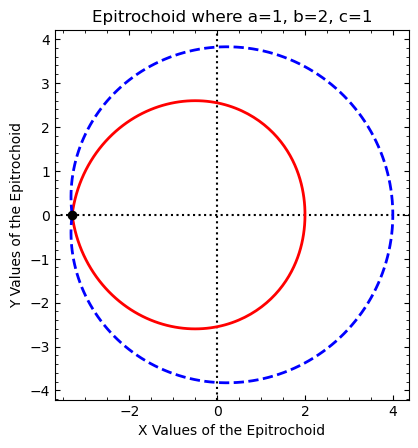

In [200]:
uin = np.linspace(roots[0], roots[1], 200)
uout = np.linspace(roots[1], roots[2], 200)

xin = epitrochoid_x(uin,a,b,c)
xout = epitrochoid_x(uout,a,b,c)
yin = epitrochoid_y(uin,a,b,c)
yout = epitrochoid_y(uout,a,b,c)

rootsx = epitrochoid_x(roots,a,b,c)
rootsy = epitrochoid_y(roots,a,b,c)

fig=plt.figure()
ax=fig.add_subplot(111)
ax.set_aspect('equal')
ax.plot(xin,yin, 'r', lw=2)
ax.plot(xout,yout, 'b--', lw=2)
ax.axhline(0,c='k', ls=':', zorder=0)
ax.axvline(0,c='k', ls=':', zorder=0)
ax.scatter(rootsx[0], rootsy[0], c='k', zorder=5)
ax.set_xlabel('X Values of the Epitrochoid')
ax.set_ylabel('Y Values of the Epitrochoid')
ax.set_title('Epitrochoid where a=1, b=2, c=1')

We can determine the length of each of the shapes.
In general, in the two dimensional plane we can compute the arc length of a curve by integrating along that curve.
For the epitrochoid the infinitesimal arc length is given by
$$ \mathrm{d}s = \sqrt{\left(\frac{\mathrm{d}x}{\mathrm{d}u}\right)^2 + \left(\frac{\mathrm{d}y}{\mathrm{d}u}\right)^2} \, \mathrm{d} u =  \frac{a+b}{b} \sqrt{b^2 + c^2 - 2 b c \cos\!\left(\frac{a u}{b} \right)} \, \mathrm{d} u. $$

Numerically integrate to calculate the arc lengths (separately) of the inner and outer shapes.
Print (and store) these two values.

In [201]:
def ds(u,a,b,c):
    return ((a+b)/b)*np.sqrt(b**2 + c**2 - 2*b*c*np.cos(a*u/b))

valin, errin = integ.quad(ds, roots[0], roots[1], args=(a,b,c))
valout, errout = integ.quad(ds, roots[1], roots[2], args=(a,b,c))
print(valin, valout)

16.394817016862525 23.69986264480325


It turns out this integral can be evaluated analytically using the fact that
\begin{align}
    I(u_0) &\equiv \int_{0}^{u_0} \frac{a+b}{b} \sqrt{b^2 + c^2 - 2 b c \cos\!\left(\frac{a u}{b} \right)} \, \mathrm{d} u \\
    & = 2 (a+b) |b - c| E\!\left(\frac{a u_0}{2 b}, -\frac{4 bc}{(b-c)^2} \right),
\end{align}
where $E(\phi, m)$ is the incomplete elliptic integral of the second kind which is available as `scipy.special.ellipeinc`.

Use this $I$ to calculate and print the fractional errors in the two arc lengths computed from the numerical integral.

In [202]:
#FIX THIS--WHAT IS U0
#on the right track maybe with difference between roots? somethign to do with make it go from 0 to length instead of roots[0] to roots[1] etc
u0in = roots[0]+roots[1]
u0out=roots[1]+roots[2]
truein = 2*(a+b)*np.abs(b-c)*sf.ellipeinc(a*u0in/(2*b), -4*b*c/(b-c)**2)
trueout = 2*(a+b)*np.abs(b-c)*sf.ellipeinc(a*u0out/(2*b), -4*b*c/(b-c)**2)
print(truein, trueout)

5.928590951498336e-13 40.09467966166636


## 3. A Very High Jump (30 points)

On October 14, 2012 Felix Baumgartner jumped from a helium balloon setting numerous records for high altitude jumps (at the time) and records for viewing the event (live streaming) on YouTube.
According to the [Red Bull Stratos Mission](https://www.redbull.com/int-en/projects/red-bull-stratos) which sponsored and documented this expedition, he jumped from $38.9694\;\mathrm{km}$, achieved a maximum vertical speed of $1357.6\;\mathrm{km/h}$, and was in freefall for 4 minutes and 20 seconds before he opened his parachute.
Another article claimed he opened his parachute when he was $1585\;\mathrm{m}$ above the ground.
Here we will develop a simple model of the jump and compare to some of these numbers.

At first glance this is straightforward.
Just considering his vertical motion we can apply Newton's second law with gravity and air resistance as the two forces acting on him.
Of course in practice some things are more complicated.

### Gravity

The jump started far enough from the surface of the Earth that we cannot treat the acceleration due to gravity as constant.
Instead, we must use Newtonian gravity.
Let $h$ be his height above the surface of the Earth at any given time, $m$ his mass, $M$ the mass of the Earth, and $R$ the radius of the Earth.
Choosing the upward direction as positive this gives
$$ F_g = - \frac{G M m}{(R + h)^2}. $$

### Air Resistance

A common model for the drag force when moving through a viscous medium is quadratic in velocity: $F_D = C A \rho v^2 / 2$.
Here $C$ is a coefficient related to the Reynolds number of the medium, $A$ is the cross sectional area of the moving object, and $\rho$ is the density of the medium.
For this jump Felix was moving through air and we will take
$$ C = 0.42, \quad A = 1.0\;\mathrm{m^2}. $$
As a further complication the density of air is not constant, it depends on altitude.
An expression for the density as a function of height from [NASA Glenn](https://www1.grc.nasa.gov/beginners-guide-to-aeronautics/earth-atmosphere-equation-metric/) models air temperature and pressure and splits the atmosphere into three zones.
To reduce excessive typing and the errors this can introduce, an implementation has been provided for you below in the function `air_density(h)`.
Notice that this function is vectorized (`h` can be a single number or an array).

### Equation of Motion

Putting this together we have the equation of motion for the height of an object in freefall given by the differential equation
$$ \frac{\mathrm{d}^2 h}{\mathrm{d} t^2} = - \frac{G M}{(R + h)^2} + \frac{C A \rho}{2 m} v^2. $$

In [203]:
# Use this function in your calculations
def air_density(h):
    """
    Air density as a function of height from the model at
    https://www1.grc.nasa.gov/beginners-guide-to-aeronautics/earth-atmosphere-equation-metric/
    Inputs:
      h: float or array: height above the surface of the Earth in meters.
    Outputs:
      rho: float or array: air density in kg / m^3.
    """
    harr = np.atleast_1d(h)
    rho = np.zeros_like(harr)
    # Helper function
    densfunc = lambda T, p: p / (0.2869 * (T + 273.1))
    # Fill in three regions based on height
    ind = harr > 25000 # Upper Stratosphere
    T = -131.21 + 0.00299 * harr[ind]
    p = 2.488 * ((T + 273.1) / 216.6)**(-11.388)
    rho[ind] = densfunc(T, p)
    ind = (25000 > harr) & (harr > 11000) # Lower Stratosphere
    T = -56.46
    p = 22.65 * np.exp(1.73 - 0.000157 * harr[ind])
    rho[ind] = densfunc(T, p)
    ind = 11000 > harr  # Troposphere
    T = 15.04 - 0.00649 * harr[ind]
    p = 101.29 * ((T + 273.1) / 288.08)**5.256
    rho[ind] = densfunc(T, p)
    if harr.size > 1:
        return rho
    else:
        return rho[0]

Write a function to pass to `solve_ivp` that will solve for the motion of freefall in the Earth's atmosphere with signature given in the cell below.
Notice that we are passing in $C$ so that we can turn on and off air resistance.
In practice we would want to pass in the other parameters, but for simplicity we can hard code them into our function for this exam.
To this end we will also use
$$ G = 6.674 \times 10^{-11} \; \mathrm{\frac{N m^2}{kg^2}}, \; R = 6378\;\mathrm{km}, \; M = 5.972 \times 10^{24} \;\mathrm{kg}, $$
for the standard constants and $m = 90\;\mathrm{kg}$ for Felix's mass.

(**Note:** Pay attention to units! In what system of units do we want to work? Is everything we need expressed in this system?)

In [204]:
G=6.674e-11
Rkm=6370
Rm=Rkm*1000
M=5.972e24
m=90
C=.42
A=1
hkm=38.9694
hm=hkm*1000

def freefall_eom(t, y, C):
    dydt=np.zeros_like(y)
    dydt[0]=y[1]
    # print(f'G: {G}\nM: {M}\nRm: {Rm}\ny: {y[0]}\nC: {C}, A: {A}\nrho: {air_density}')
    dydt[1]=-G*M/(Rm+y[0])**2 + (C*A*air_density(y[0])/(2*m))*y[1]**2
    return dydt

We will treat the jump as falling directly downward and starting from rest.
We will first solve for the case with no air resistance, $C=0$.
To at least somewhat test our code we need an even simpler case for comparison.
For the simpler case suppose an object were dropped from a height $h$ without air resistance *and with a constant gravitational acceleration* $g$.
Derive an expression for the time it would take to hit the ground under these conditions.
Also derive an expression for the speed the object would have just before it hits the ground.
Typset both of these expressions using LaTeX.

(No, this is not a trick question, these are very simple estimates that we will use to compare to the numerical results.)

We start from the kinematic equation
$$\Delta x=v_0t+\frac{1}{2}at^2.$$
Taking into account our initial conditions (starting at rest, acceleration only due to gravity, etc) we get:
$$h=\frac{1}{2}gt^2.$$
We solve this for $t$:
$$t=\sqrt{\frac{2h}{g}}.$$
We use the kinematic equation
$$v_f=v_0+at$$
to find the final speed:
$$v_f=gt=g\sqrt{\frac{2h}{g}}.$$

Use your function `freefall_eom` with `solve_ivp` to solve for the freefall of the jump with no air resistance, $C=0$.
Determine the time at which the object would hit the ground and the speed it would have just before doing so.
Also, using $g=9.8\;\mathrm{m/s^2}$, compute the numerical estimates you derived above.
Print the times in seconds and the speeds in km/h.
You should find the values agree to a coupe of digits, but of course are not exactly the same.

Here and throughout recall that *speed is a magnitude*, it is a positive quantity!

(*Note:* Both here and below using `events` simplifies the calculation, however, any *accurate* means of computing the required values from the solution of the equation of motion is acceptable.)

In [205]:
y0=np.array([hm,0])
ground = lambda t,y,C: y[0]
ground.terminal=True
sol = integ.solve_ivp(freefall_eom, (0,1000), y0, args=(0,), events=ground, atol=1e-12, rtol=1e-12)
print(f'Estimated time of impact: {np.sqrt(2*hm/9.8)} s\nSpeed immediately prior to impact: {(9.8*np.sqrt(2*hm/9.8))*3.6} km/h')
print(f'Time of impact: {sol.t_events[0][0]} s\nSpeed immediately prior to impact: {np.abs(sol.y_events[0][0][1])*3.6} km/h')

Estimated time of impact: 89.17925081267617 s
Speed immediately prior to impact: 3146.2439686712155 km/h
Time of impact: 89.5305621630207 s
Speed immediately prior to impact: 3140.281232368709 km/h


Now numerically solve for the freefall during the jump using $C=0.42$.
Find the solution all the way to the ground (as if the parachute had never been opened).
We will want to do a few things things with the solution.
In particular we will want to find
1. The time it would have taken to reach the ground if the parachute had not been deployed.
2. The speed at the ground if the parachute had not been deployed.
3. The time at which Felix is 1585 meters above the ground.
4. His speed when he is 1585 meters above the ground.

Find and print these four values.
Print both of the times in minutes and seconds and the speeds again in km/h to make your results easier to compare to the claimed values.

Note that you *will not find* exactly the same results as those claimed.
Our model is only an approximation of the actual conditions at the time of the jump.
However, all results should be reasonably close.

In [206]:
solc = integ.solve_ivp(freefall_eom, (0,1000), y0, args=(C,), events=ground, atol=1e-12, rtol=1e-12)
print(f'Time of impact w/o parachute: {sol.t_events[0][0]/60} min\nSpeed immediately prior to impact w/o parachute: {np.abs(sol.y_events[0][0][1])*3.6} km/h')

ix = np.where(solc.y[0]>=1585)[0][-1]
print(f'Time at h=1585: {solc.t[ix]/60} min\nSpeed at h=1585: {np.abs(solc.y[1][ix])*3.6} km/h')

Time of impact w/o parachute: 1.492176036050345 min
Speed immediately prior to impact w/o parachute: 3140.281232368709 km/h
Time at h=1585: 3.981202506429067 min
Speed at h=1585: 230.22614790807955 km/h


Next find the time at which Felix reached his maximum speed and the value of this speed.
Print the time in seconds and the speed in km/h.
Once again the speed should be close to the claimed value.

In [207]:
fast = np.max(np.abs(solc.y[1]))
ix=np.where(solc.y[1]==-fast)
print(f'Time at max speed: {solc.t[ix][0]} s\nMax speed: {np.abs(solc.y[1][ix][0])*3.6} km/h')

Time at max speed: 51.612738847630595 s
Max speed: 1394.6377566064134 km/h


Finally, produce a nice plot of your results showing the numerical solutions for the drop without air resistance and the actual jump.
Plot the height in km versus time in seconds for both cases.
Include a horizontal line at $1585\;\mathrm{km}$ and a vertical line at the time you found Felix reached this height.

(0.0, 260.0)

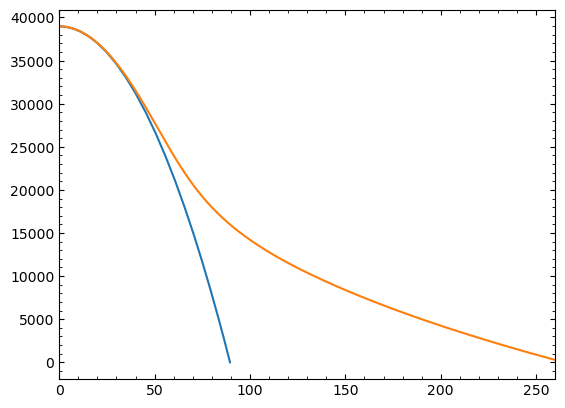

In [208]:
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(sol.t, sol.y[0])
ax.plot(solc.t, solc.y[0])
ax.set_xlim(0, 260)

## Turn in the Exam

Turn in the exam following the procedure described at the top of the notebook.